## Assignment is below at the bottom

Video 13.1
https://www.youtube.com/watch?v=kIGHE7Cfe1s

Video 13.2
https://www.youtube.com/watch?v=Rm9bJcDd1KU

Video 13.3
https://youtu.be/6HjZk-3LsjE

In [1]:
from keras.callbacks import TensorBoard
from keras.layers import Input, Dense
from keras.models import Model
from keras.datasets import mnist
import numpy as np
import tensorflow as tf
import datetime as dt
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (16, 16)
plt.rcParams['font.size'] = 14
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

(xtrain, ytrain), (xtest, ytest) = mnist.load_data()

xtrain = xtrain.astype('float32') / 255.
xtest = xtest.astype('float32') / 255.
xtrain = xtrain.reshape((len(xtrain), np.prod(xtrain.shape[1:])))
xtest = xtest.reshape((len(xtest), np.prod(xtest.shape[1:])))
xtrain.shape, xtest.shape

Num GPUs Available:  1


((60000, 784), (10000, 784))

In [2]:

# this is the size of our encoded representations
encoding_dim = 4  # 32 floats -> compression of factor 24.5, assuming the input is 784 floats

# this is our input placeholder
x = input_img = Input(shape=(784,))
# "encoded" is the encoded representation of the input
x = Dense(256, activation='relu')(x)
x = Dense(128, activation='relu')(x)
encoded = Dense(encoding_dim, activation='relu')(x)


# "decoded" is the lossy reconstruction of the input
x = Dense(128, activation='relu')(encoded)
x = Dense(256, activation='relu')(x)
decoded = Dense(784, activation='sigmoid')(x)

# this model maps an input to its reconstruction
autoencoder = Model(input_img, decoded)

encoder = Model(input_img, encoded)

# create a placeholder for an encoded (32-dimensional) input
encoded_input = Input(shape=(encoding_dim,))
# retrieve the last layer of the autoencoder model
dcd1 = autoencoder.layers[-1]
dcd2 = autoencoder.layers[-2]
dcd3 = autoencoder.layers[-3]

# create the decoder model
decoder = Model(encoded_input, dcd1(dcd2(dcd3(encoded_input))))

In [3]:
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [4]:
from tensorboard import program

log_dir = "C:/Users/gdlev/AppData/Local/Temp/autoencoder/logs/fit/" + dt.datetime.now().strftime("%Y%m%d-%H%M%S")
if __name__ == "__main__":
    tb = program.TensorBoard()
    tb.configure(argv=[None, '--logdir', log_dir])
    url = tb.launch()
    print(f"Tensorflow listening on {url}")

tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)


Tensorflow listening on http://localhost:6006/


In [5]:
history = autoencoder.fit(xtrain, xtrain,
                epochs=100,
                batch_size=256,
                shuffle=True,
                validation_data=(xtest, xtest),
                callbacks=[tensorboard_callback])                

Epoch 1/100
235/235 [==============================] - 3s 9ms/step - loss: 0.2481 - val_loss: 0.1877
Epoch 2/100
235/235 [==============================] - 2s 7ms/step - loss: 0.1799 - val_loss: 0.1735
Epoch 3/100
235/235 [==============================] - 2s 7ms/step - loss: 0.1709 - val_loss: 0.1674
Epoch 4/100
235/235 [==============================] - 2s 7ms/step - loss: 0.1659 - val_loss: 0.1638
Epoch 5/100
235/235 [==============================] - 2s 8ms/step - loss: 0.1620 - val_loss: 0.1606
Epoch 6/100
235/235 [==============================] - 2s 7ms/step - loss: 0.1595 - val_loss: 0.1583
Epoch 7/100
235/235 [==============================] - 2s 7ms/step - loss: 0.1575 - val_loss: 0.1566
Epoch 8/100
235/235 [==============================] - 2s 7ms/step - loss: 0.1559 - val_loss: 0.1554
Epoch 9/100
235/235 [==============================] - 2s 7ms/step - loss: 0.1545 - val_loss: 0.1539
Epoch 10/100
235/235 [==============================] - 2s 7ms/step - loss: 0.1533 - val_lo

In [121]:
encoded_imgs

array([[ 1.9707481,  0.       ,  0.       , ...,  8.342426 ,  6.2630024,
        11.534848 ],
       [ 5.280365 ,  0.       ,  8.033773 , ...,  2.0426934,  7.878948 ,
         4.3984838],
       [ 3.9974663,  0.       ,  2.2056983, ...,  4.0428467,  8.595585 ,
         2.9682508],
       ...,
       [ 8.609844 ,  0.       ,  9.215833 , ..., 15.954529 , 14.438898 ,
        23.025545 ],
       [ 4.8199234,  0.       , 11.494822 , ...,  9.680196 ,  7.003931 ,
         7.4360356],
       [ 7.1014156,  0.       , 19.093859 , ...,  6.1466084,  6.6854944,
        10.798484 ]], dtype=float32)

In [94]:
noise = np.random.normal(20,4, (4,8))
noise_preds = decoder.predict(noise)

1/1 [==============================] - 0s 443ms/step


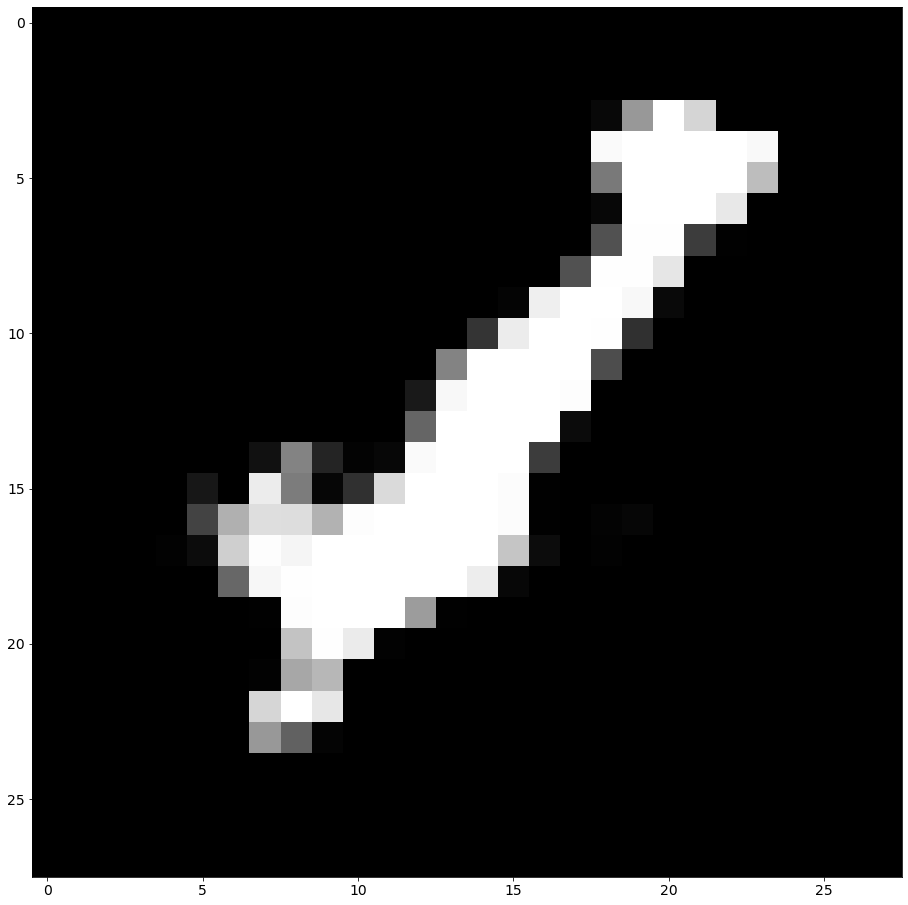

In [95]:
plt.imshow(noise_preds[1].reshape(28,28))

In [9]:
np.max(encoded_imgs)

NameError: name 'encoded_imgs' is not defined

313/313 [==============================] - 1s 2ms/step


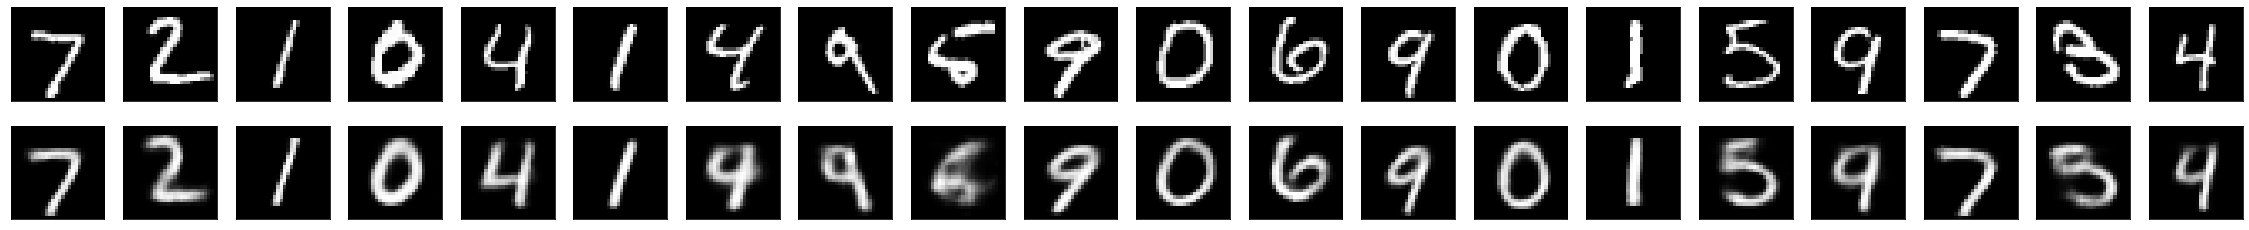

In [10]:
encoded_imgs = encoder.predict(xtest)
decoded_imgs = decoder.predict(encoded_imgs)
import matplotlib.pyplot as plt

n = 20  # how many digits we will display
plt.figure(figsize=(40, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(xtest[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [11]:
encoded_imgs

array([[22.432108 ,  3.1397989, 14.283261 , 19.346865 ],
       [ 6.250051 , 14.999794 , 13.975002 , 23.353971 ],
       [38.193222 , 27.468084 , 29.033352 , 54.27407  ],
       ...,
       [22.029963 , 11.188628 , 10.827792 , 13.666468 ],
       [22.251219 , 22.680052 ,  3.5536025, 19.580408 ],
       [20.399652 , 26.928648 , 14.511384 , 12.331304 ]], dtype=float32)

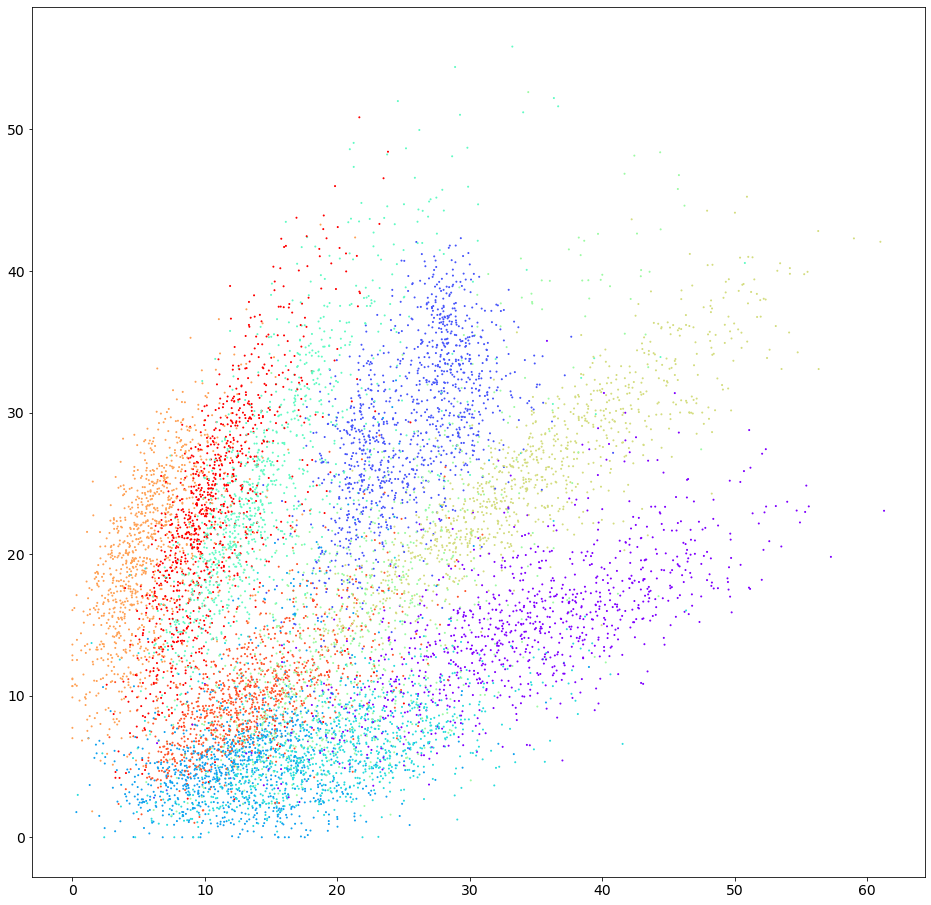

In [12]:
plt.scatter(encoded_imgs[:,1], encoded_imgs[:,0], s=1, c=ytest, cmap='rainbow')
plt.show()

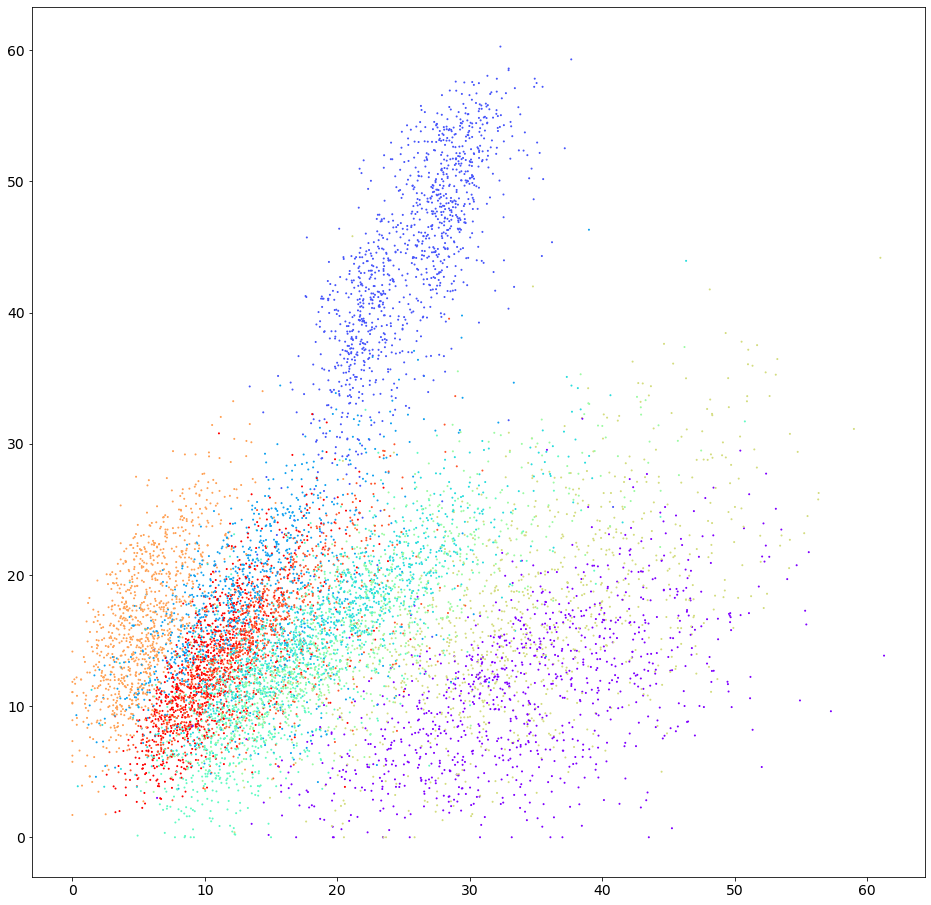

In [13]:
plt.scatter(encoded_imgs[:,1], encoded_imgs[:,3], s=1, c=ytest, cmap='rainbow')
# plt.show()

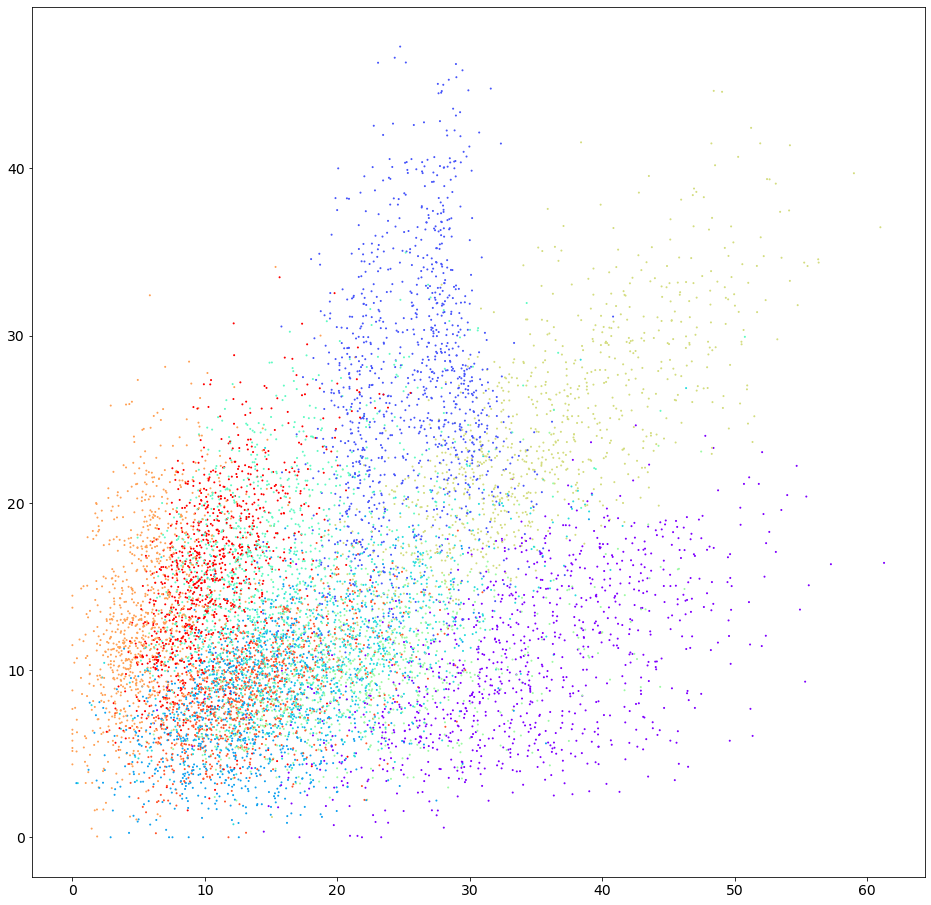

In [14]:
plt.scatter(encoded_imgs[:,1], encoded_imgs[:,2], s=1, c=ytest, cmap='rainbow')
# plt.show()

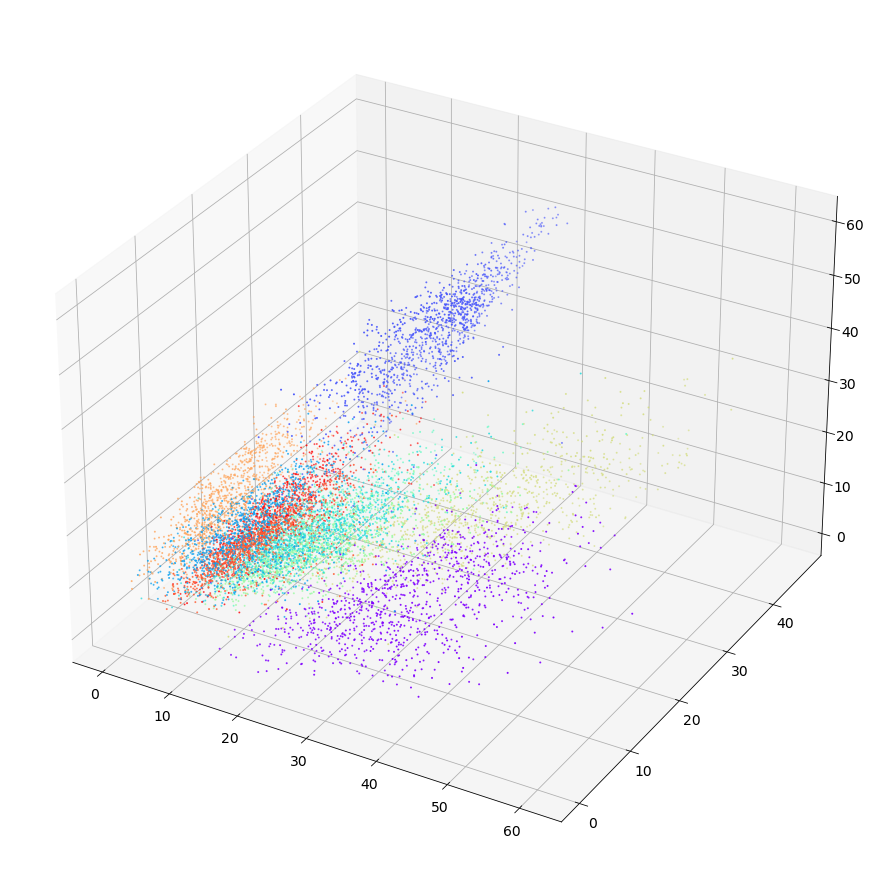

In [15]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(encoded_imgs[:,1], encoded_imgs[:,2], encoded_imgs[:,3], c=ytest, cmap='rainbow', s=1)

# Assignment


1. change the `encoding_dim` through various values (`range(2,18,2)` and store or keep track of the best loss you can get. Plot the 8 pairs of dimensions vs loss on a scatter plot


In [16]:
def train_autoencoder(encoding_dim = 2):
    
    # encoding_dim = 4  # 32 floats -> compression of factor 24.5, assuming the input is 784 floats

    # this is our input placeholder
    x = input_img = Input(shape=(784,))
    # "encoded" is the encoded representation of the input
    x = Dense(256, activation='relu')(x)
    x = Dense(128, activation='relu')(x)
    encoded = Dense(encoding_dim, activation='relu')(x)


    # "decoded" is the lossy reconstruction of the input
    x = Dense(128, activation='relu')(encoded)
    x = Dense(256, activation='relu')(x)
    decoded = Dense(784, activation='sigmoid')(x)

    # this model maps an input to its reconstruction
    autoencoder = Model(input_img, decoded)

    encoder = Model(input_img, encoded)

    # create a placeholder for an encoded (32-dimensional) input
    encoded_input = Input(shape=(encoding_dim,))
    # retrieve the last layer of the autoencoder model
    dcd1 = autoencoder.layers[-1]
    dcd2 = autoencoder.layers[-2]
    dcd3 = autoencoder.layers[-3]

    # create the decoder model
    decoder = Model(encoded_input, dcd1(dcd2(dcd3(encoded_input))))
    
    autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
    
    from tensorboard import program

    log_dir = "C:/Users/gdlev/AppData/Local/Temp/autoencoder/logs/fit/" + dt.datetime.now().strftime("%Y%m%d-%H%M%S") + str(encoding_dim)
    if __name__ == "__main__":
        tb = program.TensorBoard()
        tb.configure(argv=[None, '--logdir', log_dir])
        url = tb.launch()
        print(f"Tensorflow listening on {url}")

    tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)
    
    history = autoencoder.fit(xtrain, xtrain,
                epochs=100,
                batch_size=256,
                shuffle=True,
                validation_data=(xtest, xtest),
                callbacks=[tensorboard_callback])
    return history
            

In [17]:
dimensions = range(2,18,2)
losses = []
for encoding_dim in dimensions:
    print(f"Encoding Dimensions: {encoding_dim}") 
    loss = train_autoencoder(encoding_dim=encoding_dim)
    losses.append(loss)
    

Encoding Dimensions: 2
Tensorflow listening on http://localhost:6006/
Epoch 1/100
235/235 [==============================] - 3s 9ms/step - loss: 0.2821 - val_loss: 0.2505
Epoch 2/100
235/235 [==============================] - 2s 10ms/step - loss: 0.2458 - val_loss: 0.2403
Epoch 3/100
235/235 [==============================] - 2s 10ms/step - loss: 0.2378 - val_loss: 0.2332
Epoch 4/100
235/235 [==============================] - 2s 8ms/step - loss: 0.2313 - val_loss: 0.2287
Epoch 5/100
235/235 [==============================] - 2s 8ms/step - loss: 0.2278 - val_loss: 0.2262
Epoch 6/100
235/235 [==============================] - 2s 9ms/step - loss: 0.2257 - val_loss: 0.2241
Epoch 7/100
235/235 [==============================] - 2s 9ms/step - loss: 0.2237 - val_loss: 0.2225
Epoch 8/100
235/235 [==============================] - 2s 9ms/step - loss: 0.2219 - val_loss: 0.2213
Epoch 9/100
235/235 [==============================] - 2s 8ms/step - loss: 0.2119 - val_loss: 0.2014
Epoch 10/100
235/23

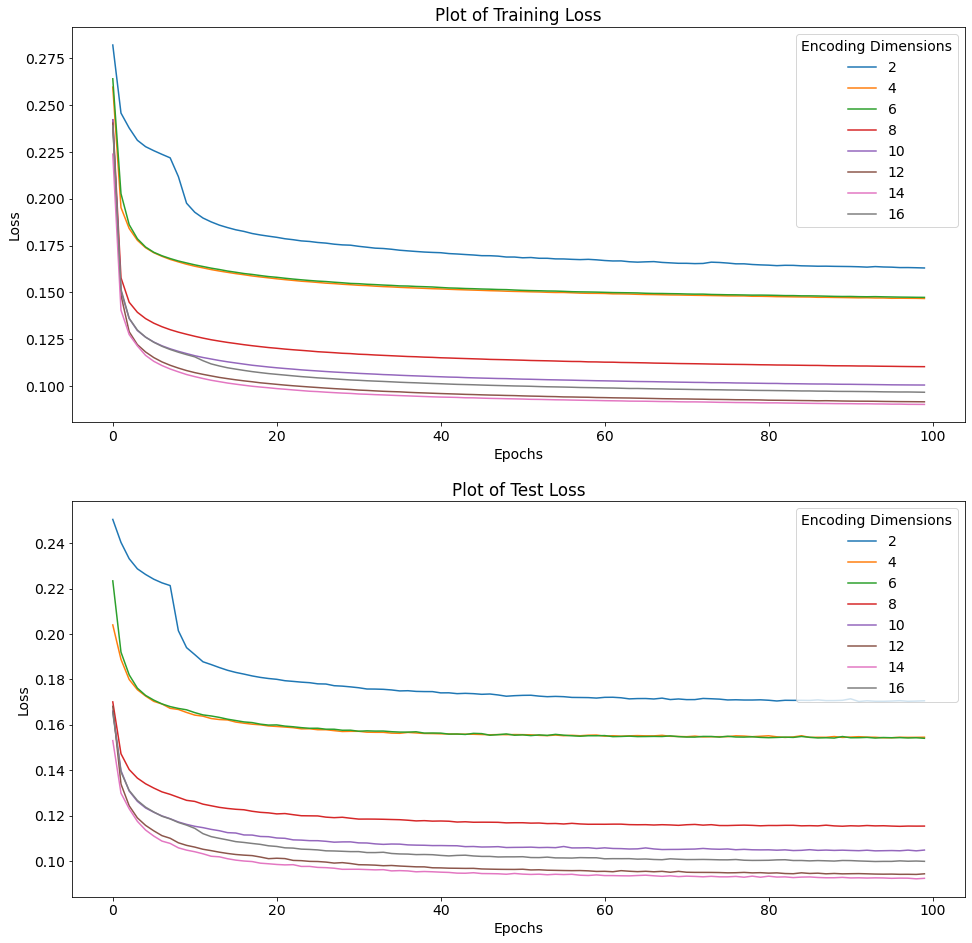

In [32]:
fig, ax = plt.subplots(2,1)
for i in range(len(dimensions)):
    ax[0].plot(losses[i].history['loss'], label = dimensions[i])
    ax[0].set_xlabel('Epochs')
    ax[0].set_ylabel('Loss')
    ax[0].legend(loc = "upper right", title = "Encoding Dimensions")
    ax[0].set_title("Plot of Training Loss")
    
    ax[1].plot(losses[i].history['val_loss'], label = dimensions[i])
    ax[1].set_xlabel('Epochs')
    ax[1].set_ylabel('Loss')
    ax[1].legend(loc = "upper right", title = "Encoding Dimensions")
    ax[1].set_title("Plot of Test Loss")
    

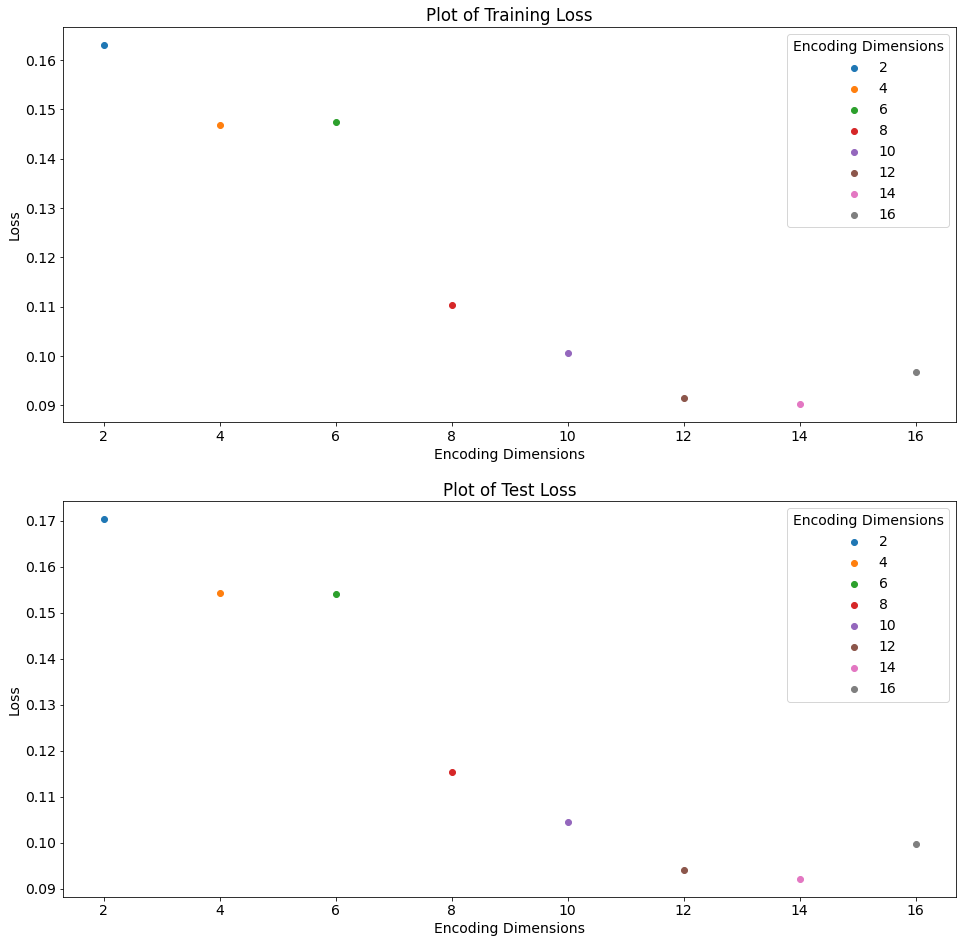

In [87]:
fig, ax = plt.subplots(2,1)
for i in range(len(dimensions)):
    ax[0].scatter(dimensions[i], np.min(losses[i].history['loss']), label = dimensions[i])
    ax[0].set_xlabel('Encoding Dimensions')
    ax[0].set_ylabel('Loss')
    ax[0].legend(loc = "upper right", title = "Encoding Dimensions")
    ax[0].set_title("Plot of Training Loss")
    
    ax[1].scatter(dimensions[i], np.min(losses[i].history['val_loss']), label = dimensions[i])
    ax[1].set_xlabel('Encoding Dimensions')
    ax[1].set_ylabel('Loss')
    ax[1].legend(loc = "upper right", title = "Encoding Dimensions")
    ax[1].set_title("Plot of Test Loss")
    



2. **_After_** training an autoencoder with `encoding_dim=8`, apply noise (like the previous assignment) to *_only_* the input of the trained autoencoder (not the output). The output images should be without noise. 

Print a few noisy images along with the output images to show they don't have noise.

In [84]:
encoding_dim = 8

x = input_img = Input(shape=(784,))
# "encoded" is the encoded representation of the input
x = Dense(256, activation='relu')(x)
x = Dense(128, activation='relu')(x)
encoded = Dense(encoding_dim, activation='relu')(x)


# "decoded" is the lossy reconstruction of the input
x = Dense(128, activation='relu')(encoded)
x = Dense(256, activation='relu')(x)
decoded = Dense(784, activation='sigmoid')(x)

# this model maps an input to its reconstruction
autoencoder = Model(input_img, decoded)

encoder = Model(input_img, encoded)

# create a placeholder for an encoded (32-dimensional) input
encoded_input = Input(shape=(encoding_dim,))
# retrieve the last layer of the autoencoder model
dcd1 = autoencoder.layers[-1]
dcd2 = autoencoder.layers[-2]
dcd3 = autoencoder.layers[-3]

# create the decoder model
decoder = Model(encoded_input, dcd1(dcd2(dcd3(encoded_input))))

autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

from tensorboard import program

log_dir = "C:/Users/gdlev/AppData/Local/Temp/autoencoder/logs/fit/" + dt.datetime.now().strftime("%Y%m%d-%H%M%S") + str(encoding_dim)
if __name__ == "__main__":
    tb = program.TensorBoard()
    tb.configure(argv=[None, '--logdir', log_dir])
    url = tb.launch()
    print(f"Tensorflow listening on {url}")

tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)


xtrain_noise = xtrain + np.random.normal(1, 0.1, (60000, 784))
history = autoencoder.fit(xtrain_noise, xtrain,
            epochs=100,
            batch_size=256,
            shuffle=True,
            validation_data=(xtest, xtest),
            callbacks=[tensorboard_callback])
     

Tensorflow listening on http://localhost:6006/
Epoch 1/100
235/235 [==============================] - 2s 8ms/step - loss: 0.2656 - val_loss: 0.5695
Epoch 2/100
235/235 [==============================] - 2s 7ms/step - loss: 0.2272 - val_loss: 0.4106
Epoch 3/100
235/235 [==============================] - 2s 7ms/step - loss: 0.2083 - val_loss: 0.3623
Epoch 4/100
235/235 [==============================] - 2s 7ms/step - loss: 0.2006 - val_loss: 0.3287
Epoch 5/100
235/235 [==============================] - 2s 7ms/step - loss: 0.1899 - val_loss: 0.3063
Epoch 6/100
235/235 [==============================] - 2s 7ms/step - loss: 0.1771 - val_loss: 0.3145
Epoch 7/100
235/235 [==============================] - 2s 7ms/step - loss: 0.1727 - val_loss: 0.3158
Epoch 8/100
235/235 [==============================] - 2s 7ms/step - loss: 0.1678 - val_loss: 0.3285
Epoch 9/100
235/235 [==============================] - 2s 7ms/step - loss: 0.1601 - val_loss: 0.3259
Epoch 10/100
235/235 [======================

313/313 [==============================] - 0s 1ms/step


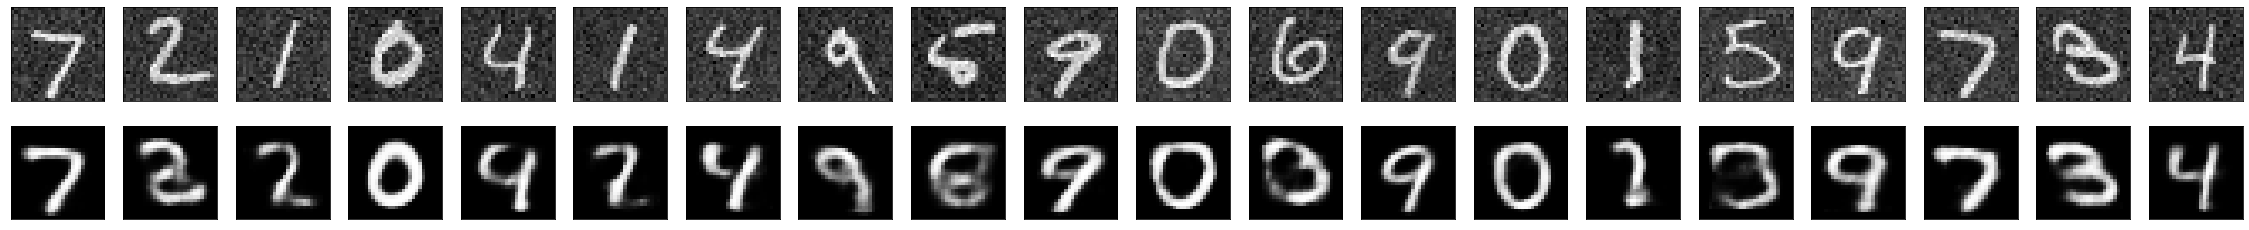

In [120]:
xtest_noise = xtest + np.random.normal(0,0.1, (10000, 784))
encoded_imgs = encoder.predict(xtest_noise)
decoded_imgs = decoder.predict(encoded_imgs)
import matplotlib.pyplot as plt

n = 20  # how many digits we will display
plt.figure(figsize=(40, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(xtest_noise[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()